# Main Code for MNIST

In [71]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="5"

#from __future__ import print_function

# Import MNIST data
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


import tensorflow as tf
training_epochs = 150
batch_size = 100
display_step = 1

# Network Parameters: Number of Units per Layer
n_hidden_1 = 1024 
n_hidden_2 = 1024 
n_hidden_3 = 1024 
n_hidden_4 = 1024 
n_hidden_5 = 1024 

n_input = 784 
n_classes = 10 

# tf Graph input
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])


weights = {
    'h1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3])),
    'h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4])),
    'h5': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_5])),
    'out': tf.Variable(tf.truncated_normal([n_hidden_5, n_classes]))
}


biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'b4': tf.Variable(tf.random_normal([n_hidden_4])),
    'b5': tf.Variable(tf.random_normal([n_hidden_5])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


# def dnn(x):
layer_1 = (tf.matmul(X, weights['h1']) + biases['b1'])
layer_2 = tf.nn.relu(tf.matmul(layer_1, weights['h2']) + biases['b2'])
layer_3 = tf.nn.relu(tf.matmul(layer_2, weights['h3']) + biases['b3'])
layer_4 = tf.nn.relu(tf.matmul(layer_3, weights['h4']) + biases['b4'])
layer_5 = tf.nn.relu(tf.matmul(layer_4, weights['h5']) + biases['b5'])
   
# Output fully connected layer with a neuron for each class
out_layer = tf.matmul(layer_5, weights['out']) + biases['out']
# return out_layer

# Construct model
# logits = dnn(X)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=out_layer, labels=Y))
optimizer = tf.train.RMSPropOptimizer(learning_rate=0.002)
train_op = optimizer.minimize(loss_op)


# Initializing the variables
init = tf.global_variables_initializer()

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
                
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            _, c = sess.run([train_op, loss_op], feed_dict={X: batch_x, Y: batch_y})
                    
            # Compute average loss
            avg_cost += c / total_batch
            
        saver.save(sess, './mnist')
            
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost={:.9f}".format(avg_cost))
            
            pred = tf.nn.softmax(out_layer)  
            correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
            print("Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))
            
            
            if accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}) >= 0.98: 
                print("Accuracy reached 98% :", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels})) 
                print("-------------------------------------------------------");break

          
    # Test model
    pred = tf.nn.softmax(out_layer)  # Apply softmax to logits
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    prediction_ = tf.argmax(Y,1)
    #print(prediction_.eval(feed_dict={X: mnist.test.images, Y: mnist.test.labels}))
    
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({X: mnist.test.images, Y: mnist.test.labels}))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost=1627737.632794300
Accuracy: 0.9228
Epoch: 0002 cost=322822.228147638
Accuracy: 0.9514
Epoch: 0003 cost=196585.694549672
Accuracy: 0.9546
Epoch: 0004 cost=131239.263777133
Accuracy: 0.9608
Epoch: 0005 cost=109115.563241466
Accuracy: 0.9645
Epoch: 0006 cost=87229.101653165
Accuracy: 0.9601
Epoch: 0007 cost=74046.786450667
Accuracy: 0.9688
Epoch: 0008 cost=59422.683059082
Accuracy: 0.9671
Epoch: 0009 cost=57465.496928822
Accuracy: 0.9695
Epoch: 0010 cost=47775.280125379
Accuracy: 0.9719
Epoch: 0011 cost=46308.101259183
Accuracy: 0.9672
Epoch: 0012 cost=39133.850190319
Accuracy: 0.9683
Epoch: 0013 cost=36928.609368564
Accuracy: 0.9705
Epoch: 0014 cost=35004.089436146
Accuracy: 0.9741
Epoch: 0015 cost=32278.961087203
Accuracy: 0.9733
Epoch: 0016 cost=27727.175230935
Accuracy: 0.971
E

# Storing 1000 outputs from each layer 

In [72]:
import tensorflow as tf
with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess, "./mnist")
    batch_x, batch_y = mnist.train.next_batch(1000)
    
    l1_op, l2_op, l3_op, l4_op, l5_op, op, predictions_1000 = sess.run([layer_1, layer_2, layer_3, layer_4, layer_5, out_layer, pred], feed_dict={X: mnist.test.images[0:1000], Y: mnist.test.labels[0:1000]})

INFO:tensorflow:Restoring parameters from ./mnist


# Creating Subplots as per highest Probability

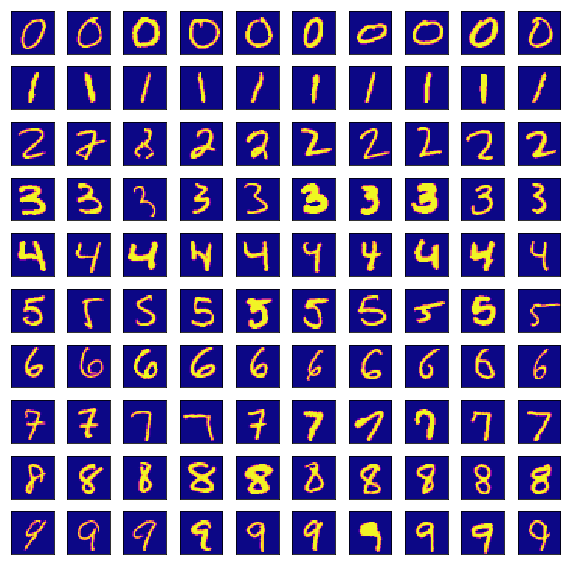

In [52]:
import matplotlib.pyplot as plt
import numpy as np
max_pred = np.amax(predictions_1000, axis=1)

#plot intializations
images = []; labels = []; imgSize = (28, 28) 

def plots(images):
    
    fig, axes = plt.subplots(10, 10)
    fig.set_size_inches(10, 10)
    fig.subplots_adjust(hspace=0.3, wspace=0.1)
    
    for i, ax in enumerate(axes.flat):
            ax.imshow(images[int(i / 10)][i % 10, :].reshape(imgSize), cmap='plasma')
            ax.set_xlabel('')
            ax.set_xticks([])
            ax.set_yticks([])

    plt.show()

for i in range(0, 10):
    images.append(mnist.test.images[np.argpartition(predictions_1000[:,i], -10)[-10:]])
    labels.append(mnist.test.labels[np.argpartition(predictions_1000[:,0], -10)[-10:]])
    
plots(images)

# For the Second-To-Last Layer

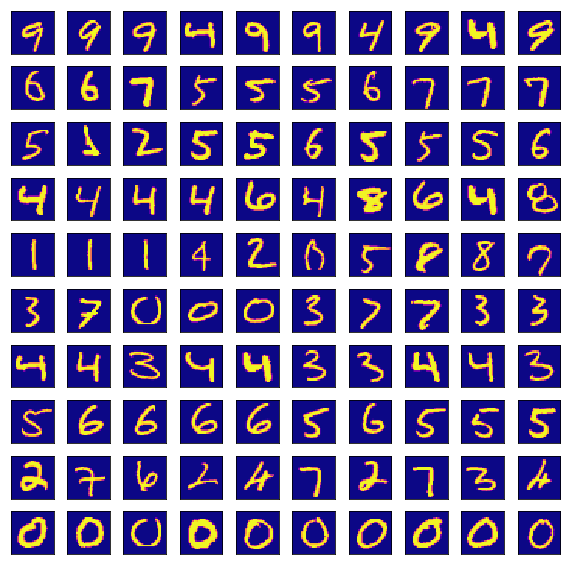

In [53]:
import matplotlib.pyplot as plt
import numpy as np
max_pred = np.argmax(l5_op, axis=1)

#plot intializations
images = []; labels = []; imgSize = (28, 28) 

def plots(images):
    
    fig, axes = plt.subplots(10, 10)
    fig.set_size_inches(10, 10)
    fig.subplots_adjust(hspace=0.3, wspace=0.1)
    
    for i, ax in enumerate(axes.flat):
            ax.imshow(images[int(i / 10)][i % 10, :].reshape(imgSize), cmap='plasma')
            ax.set_xlabel('')
            ax.set_xticks([])
            ax.set_yticks([])

    plt.show()

for i in range(0, 10):
    images.append(mnist.test.images[np.argpartition(l5_op[:,i], -10)[-10:]])
    labels.append(mnist.test.labels[np.argpartition(l5_op[:,0], -10)[-10:]])
    
plots(images)

# Taking 1000 test samples from MNIST dataset

In [54]:
inputs_test_images = mnist.test.images[:1000]
outputs_test_labels = np.argmax(np.array(mnist.test.labels[:1000]), axis = 1)

In [75]:
from time import time

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

digits = datasets.load_digits(n_class=6)
X = inputs_test_images
y = outputs_test_labels
n_samples, n_features = X.shape
n_neighbors = 30

def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    
    mean = []
    for i in range(0, 10):
        mean.append(X[np.where(outputs_test_labels == i)].mean(axis=0))

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]), color=plt.cm.Set1(y[i] / 10.), fontdict={'weight': 'bold', 'size': 9})
    
    for i in range(0, 10):
        plt.annotate(''+str(i), xy=(mean[i][0], mean[i][1]), xytext=(mean[i][0], mean[i][1]), fontsize = 20)
        
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

# t-SNE Plot for 1000 test samples

Computing t-SNE embedding
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.018s...
[t-SNE] Computed neighbors for 1000 samples in 1.750s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2.547940
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.834549
[t-SNE] Error after 1000 iterations: 1.058658


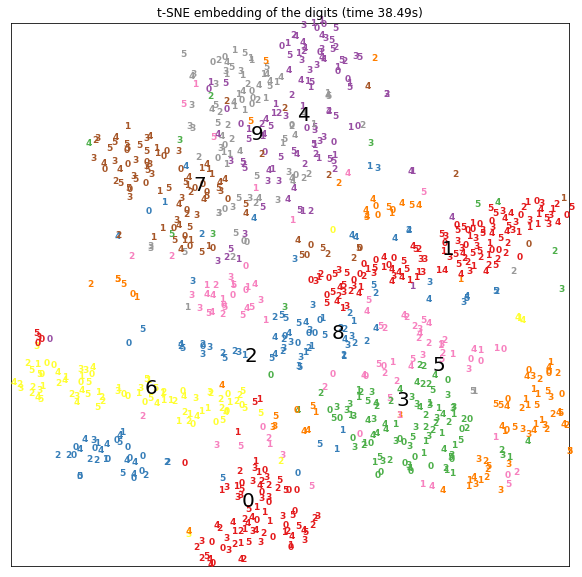

In [76]:
from time import time
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, verbose= 1, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(np.array(inputs_test_images))


plot_embedding(X_tsne, "t-SNE embedding of the digits (time %.2fs)" % (time() - t0))

plt.show()

# t-SNE Plot for 1st Hidden Layer 

Computing t-SNE embedding
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.029s...
[t-SNE] Computed neighbors for 1000 samples in 2.346s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 59.517133
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.204018
[t-SNE] Error after 1000 iterations: 1.058980


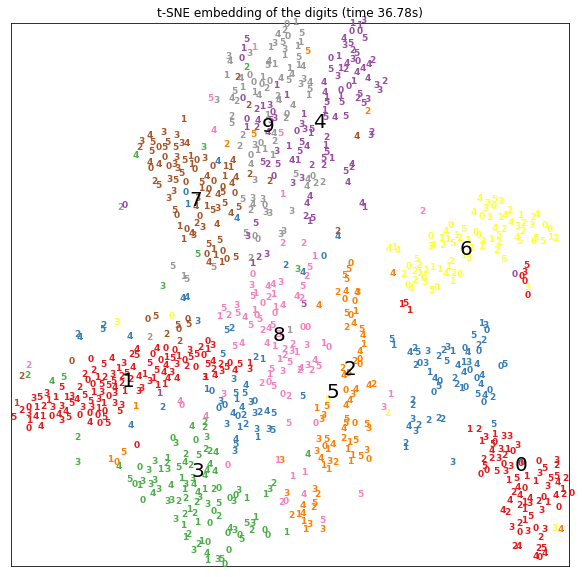

In [77]:
from time import time
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, verbose= 1, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(np.array(l1_op))


plot_embedding(X_tsne, "t-SNE embedding of the digits (time %.2fs)" % (time() - t0))

plt.show()

# t-SNE Plot for 2nd Hidden Layer 

Computing t-SNE embedding
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.024s...
[t-SNE] Computed neighbors for 1000 samples in 2.327s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1240.077064
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.142548
[t-SNE] Error after 1000 iterations: 0.941658


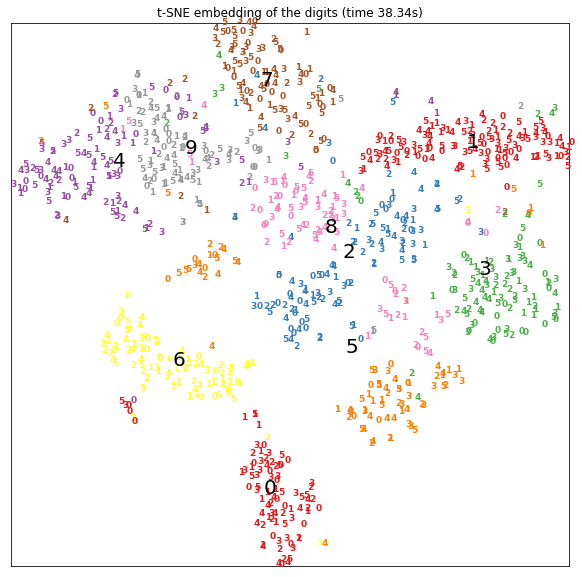

In [78]:
from time import time
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, verbose= 1, random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(np.array(l2_op))


plot_embedding(X_tsne, "t-SNE embedding of the digits (time %.2fs)" % (time() - t0))

plt.show()

# t-SNE Plot for 3rd Hidden Layer 

Computing t-SNE embedding
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.024s...
[t-SNE] Computed neighbors for 1000 samples in 2.200s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 17168.409128
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.910988
[t-SNE] Error after 1000 iterations: 0.875406


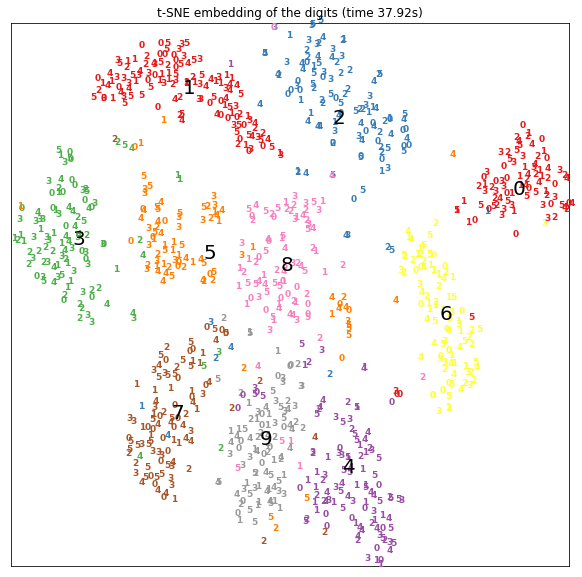

In [79]:
from time import time
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, verbose= 1, random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(np.array(l3_op))


plot_embedding(X_tsne, "t-SNE embedding of the digits (time %.2fs)" % (time() - t0))

plt.show()

# t-SNE Plot for 4th Hidden Layer 

Computing t-SNE embedding
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.024s...
[t-SNE] Computed neighbors for 1000 samples in 2.329s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 236454.571840
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.267899
[t-SNE] Error after 1000 iterations: 0.775325


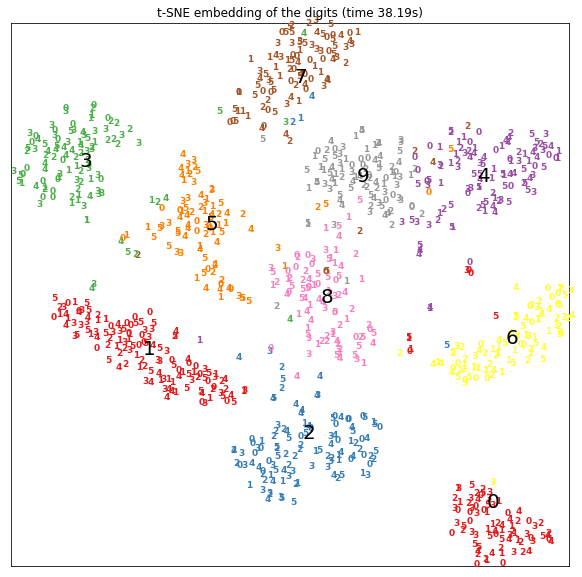

In [80]:
from time import time
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, verbose= 1, random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(np.array(l4_op))


plot_embedding(X_tsne, "t-SNE embedding of the digits (time %.2fs)" % (time() - t0))

plt.show()

# t-SNE Plot for 5th Hidden Layer 

Computing t-SNE embedding
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.024s...
[t-SNE] Computed neighbors for 1000 samples in 2.340s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 2793036.353127
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.673759
[t-SNE] Error after 1000 iterations: 0.727342


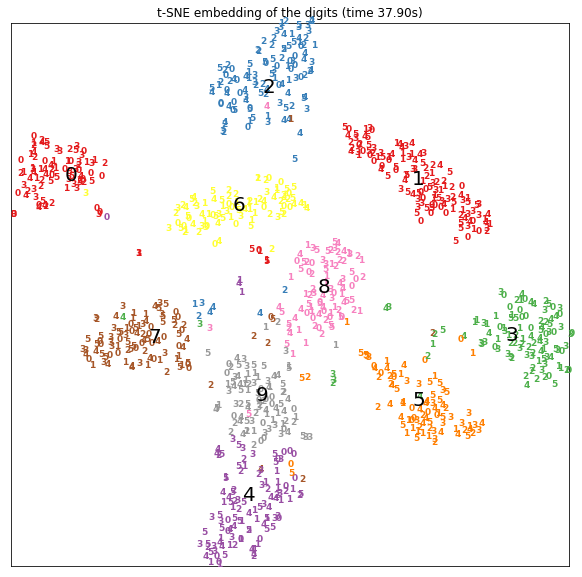

In [81]:
from time import time
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, verbose= 1, random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(np.array(l5_op))


plot_embedding(X_tsne, "t-SNE embedding of the digits (time %.2fs)" % (time() - t0))

plt.show()

# t-SNE Plot for Output Layer 

Computing t-SNE embedding
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.001s...
[t-SNE] Computed neighbors for 1000 samples in 0.044s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 11200331.314688
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.132023
[t-SNE] Error after 1000 iterations: 0.534108


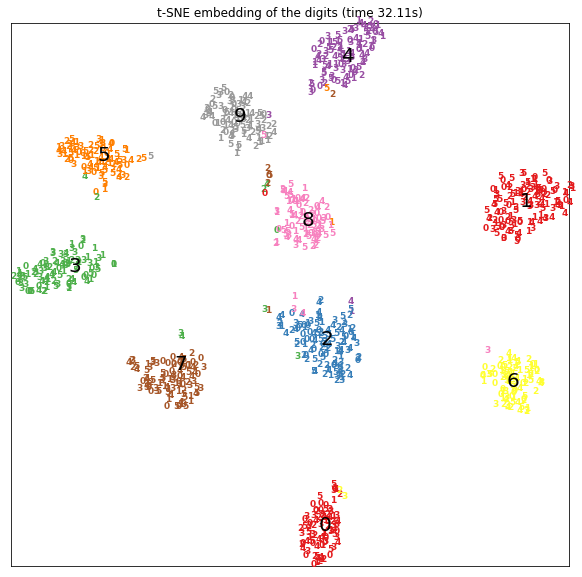

In [82]:
from time import time
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, verbose= 1, random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(np.array(op))


plot_embedding(X_tsne, "t-SNE embedding of the digits (time %.2fs)" % (time() - t0))

plt.show()

# PCA Plot for 1000 test samples 

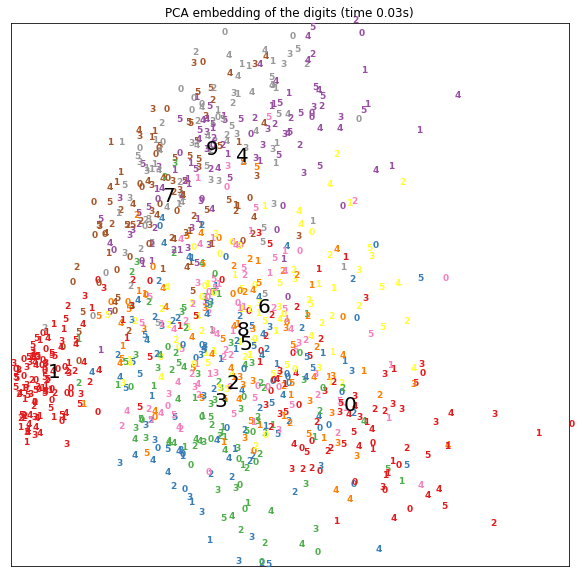

In [83]:
from sklearn.decomposition import PCA
from time import time
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection)

pca = PCA(n_components=2)
t0 = time()
X_pca = pca.fit_transform(np.array(inputs_test_images))


plot_embedding(X_pca, "PCA embedding of the digits (time %.2fs)" % (time() - t0))

plt.show()

# PCA Plot for 1st Hidden Layer 

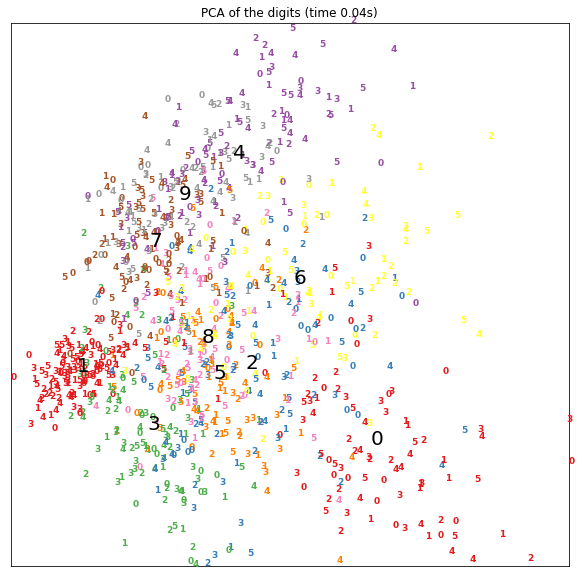

In [84]:
pca = PCA(n_components=2)
t0 = time()
X_pca = pca.fit_transform(np.array(l1_op))


plot_embedding(X_pca, "PCA of the digits (time %.2fs)" % (time() - t0))

plt.show()

# PCA Plot for 2nd Hidden Layer 

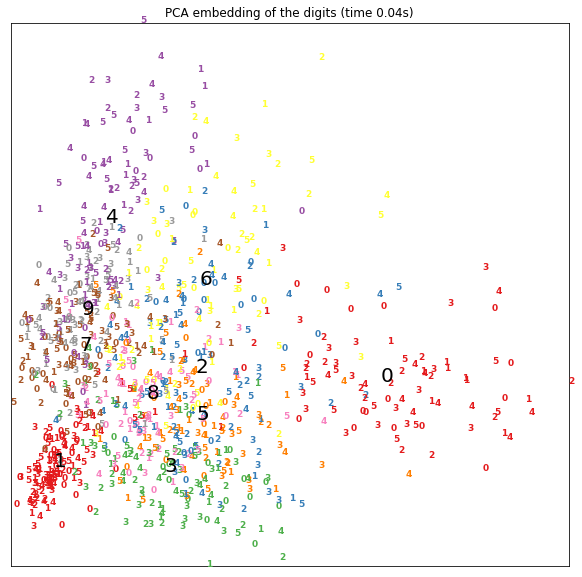

In [85]:
pca = PCA(n_components=2)
t0 = time()
X_pca = pca.fit_transform(np.array(l2_op))


plot_embedding(X_pca, "PCA embedding of the digits (time %.2fs)" % (time() - t0))

plt.show()

# PCA Plot for 3rd Hidden Layer 

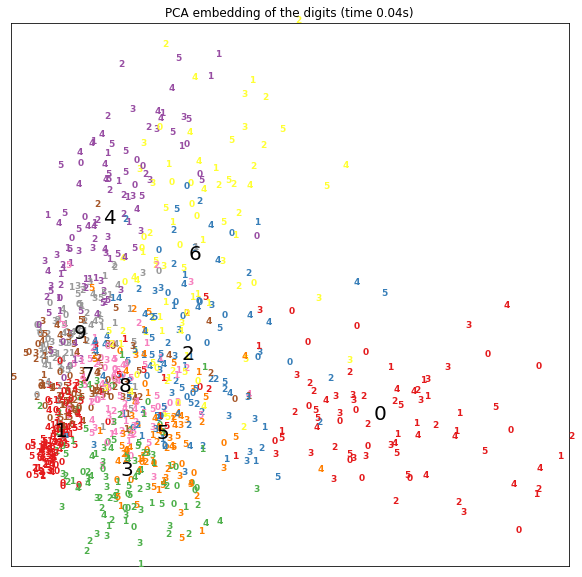

In [86]:
pca = PCA(n_components=2)
t0 = time()
X_pca = pca.fit_transform(np.array(l3_op))


plot_embedding(X_pca, "PCA embedding of the digits (time %.2fs)" % (time() - t0))

plt.show()

# PCA Plot for 4th Hidden Layer  

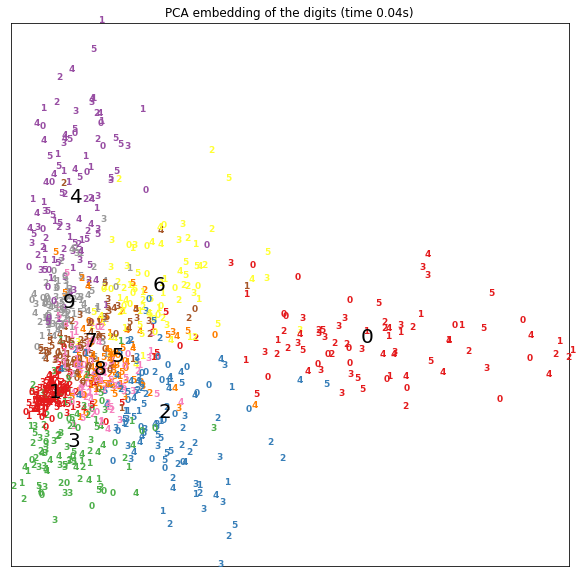

In [87]:
pca = PCA(n_components=2)
t0 = time()
X_pca = pca.fit_transform(np.array(l4_op))


plot_embedding(X_pca, "PCA embedding of the digits (time %.2fs)" % (time() - t0))

plt.show()

# PCA Plot for 5th Hidden Layer 

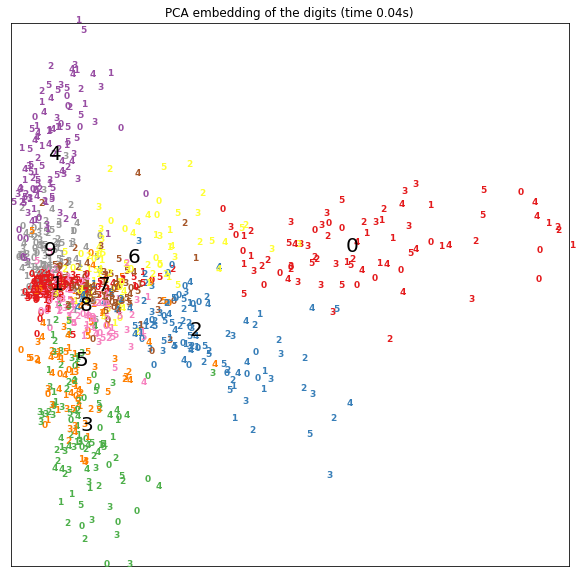

In [88]:
pca = PCA(n_components=2)
t0 = time()
X_pca = pca.fit_transform(np.array(l5_op))


plot_embedding(X_pca, "PCA embedding of the digits (time %.2fs)" % (time() - t0))

plt.show()

# PCA for output layer

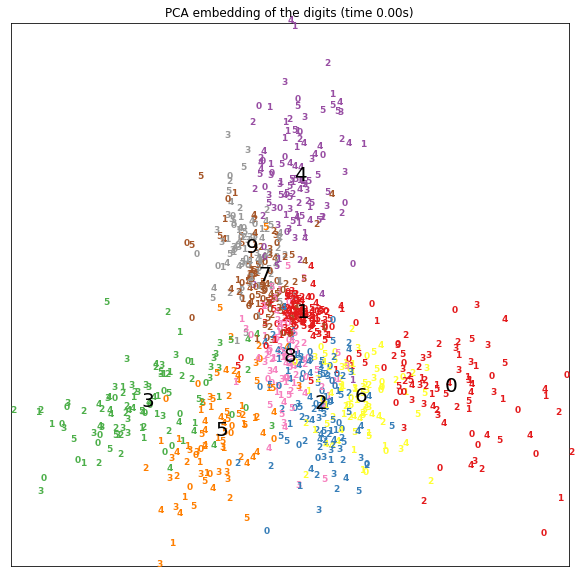

In [89]:
# from sklearn.decomposition import PCA
# opPCA= PCA(n_components=2).fit_transform(op) 
# scatter_(opPCA, inputs_test_images, outputs_test_labels)

pca = PCA(n_components=2)
t0 = time()
X_pca = pca.fit_transform(np.array(op))


plot_embedding(X_pca, "PCA embedding of the digits (time %.2fs)" % (time() - t0))

plt.show()